## **Tema: Analisis Sentimen Ulasan Pengguna terhadap Aplikasi Pembelajaran Bahasa di Google Play Store**

**Scraping Data**

In [2]:
pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.8 MB/s eta 0:00:00


In [3]:
from google_play_scraper import reviews, Sort
import pandas as pd

# Daftar aplikasi (ID dari URL Google Play)
apps = {
    "Duolingo": "com.duolingo",
    "Busuu": "com.busuu.android.enc",
    "HelloTalk": "com.hellotalk"
}

# Jumlah ulasan yang ingin diambil per aplikasi
N = 500

all_reviews = []

# Loop scraping untuk tiap aplikasi
for name, app_id in apps.items():
    result, _ = reviews(
        app_id,
        lang='id',           # ambil ulasan dalam bahasa Indonesia
        country='id',        # region Indonesia
        sort=Sort.NEWEST,    # bisa diganti ke Sort.MOST_RELEVANT
        count=N              # jumlah ulasan
    )

    # Simpan hasilnya ke dalam list
    for r in result:
        all_reviews.append({
            "app_name": name,
            "user_name": r["userName"],
            "rating": r["score"],
            "review": r["content"],
            "thumbs_up": r["thumbsUpCount"],
            "date": r["at"].strftime("%Y-%m-%d")
        })

# Konversi ke DataFrame
df = pd.DataFrame(all_reviews)

# Simpan ke CSV
# df.to_csv("ulasan_aplikasi_bahasa.csv", index=False, encoding='utf-8')

**Case Folding**

In [4]:
import pandas as pd
# Load data hasil scraping
# df = pd.read_csv("ulasan_aplikasi_bahasa.csv")

# Ubah semua huruf menjadi huruf kecil
df['casefolded_review'] = df['review'].astype(str).str.lower()

# 3. Simpan hasil
df.to_csv("ulasan_aplikasi_bahasa_casefolded.csv", index=False, encoding='utf-8')

**Preprocessing**

Tokenisasi

In [1]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [10]:
#fungsi untuk melakukan tokenisasi
def tokenize_text(text):
    return word_tokenize(text)

#menambahkan kolom baru tokenize_ulasan
df['tokenize_review'] = df['casefolded_review'].apply(tokenize_text)

#menampilkan dataframe dengan kolom baru 'tokenize_ulasan
df.head()

,app_name,user_name,rating,review,thumbs_up,date,casefolded_review,tokenize_review
0,Duolingo,Mutya Azkia,5,seruu,0,2025-10-18,seruu,[seruu]
1,Duolingo,franskris harefa,3,berikan soal yg berbeda-beda,0,2025-10-18,berikan soal yg berbeda-beda,"[berikan, soal, yg, berbeda-beda]"
2,Duolingo,Lukman Hakim,5,Karena aplikasi ini membantu aku untuk belajar...,0,2025-10-18,karena aplikasi ini membantu aku untuk belajar...,"[karena, aplikasi, ini, membantu, aku, untuk, ..."
3,Duolingo,Kirana Aura,5,sangat seru,0,2025-10-18,sangat seru,"[sangat, seru]"
4,Duolingo,Winarsih Tri Utami,5,luar biasa!,0,2025-10-18,luar biasa!,"[luar, biasa, !]"


Menghapus Tanda Baca

In [11]:
import string

#fungsi untuk menghapus tanda baca
def remove_punctuation(tokens):
  table= str.maketrans("","",string.punctuation)
  return [word.translate(table) for word in tokens]

#menambahkan kolom baru tanpa tanda baca
df['review_tanpa_tanda_baca'] = df['tokenize_review'].apply(remove_punctuation)

#menampilkan dataframe dengan kolom baru
df.head()

,app_name,user_name,rating,review,thumbs_up,date,casefolded_review,tokenize_review,review_tanpa_tanda_baca
0,Duolingo,Mutya Azkia,5,seruu,0,2025-10-18,seruu,[seruu],[seruu]
1,Duolingo,franskris harefa,3,berikan soal yg berbeda-beda,0,2025-10-18,berikan soal yg berbeda-beda,"[berikan, soal, yg, berbeda-beda]","[berikan, soal, yg, berbedabeda]"
2,Duolingo,Lukman Hakim,5,Karena aplikasi ini membantu aku untuk belajar...,0,2025-10-18,karena aplikasi ini membantu aku untuk belajar...,"[karena, aplikasi, ini, membantu, aku, untuk, ...","[karena, aplikasi, ini, membantu, aku, untuk, ..."
3,Duolingo,Kirana Aura,5,sangat seru,0,2025-10-18,sangat seru,"[sangat, seru]","[sangat, seru]"
4,Duolingo,Winarsih Tri Utami,5,luar biasa!,0,2025-10-18,luar biasa!,"[luar, biasa, !]","[luar, biasa, ]"


Menghapus Whitespace (Karakter Kosong)

In [14]:
#fungsi untuk membersihkan setiap token dari spasi dan tab di awal dan akhir
def clean_whitespace(tokens):
  return [token.strip() for token in tokens]

#menambahkan kolom baru tanpa spasi atau whitespace
df['review_tanpa_spasi'] = df['review_tanpa_tanda_baca'].apply(clean_whitespace)

df.head()

,app_name,user_name,rating,review,thumbs_up,date,casefolded_review,tokenize_review,review_tanpa_tanda_baca,review_tanpa_spasi
0,Duolingo,Mutya Azkia,5,seruu,0,2025-10-18,seruu,[seruu],[seruu],[seruu]
1,Duolingo,franskris harefa,3,berikan soal yg berbeda-beda,0,2025-10-18,berikan soal yg berbeda-beda,"[berikan, soal, yg, berbeda-beda]","[berikan, soal, yg, berbedabeda]","[berikan, soal, yg, berbedabeda]"
2,Duolingo,Lukman Hakim,5,Karena aplikasi ini membantu aku untuk belajar...,0,2025-10-18,karena aplikasi ini membantu aku untuk belajar...,"[karena, aplikasi, ini, membantu, aku, untuk, ...","[karena, aplikasi, ini, membantu, aku, untuk, ...","[karena, aplikasi, ini, membantu, aku, untuk, ..."
3,Duolingo,Kirana Aura,5,sangat seru,0,2025-10-18,sangat seru,"[sangat, seru]","[sangat, seru]","[sangat, seru]"
4,Duolingo,Winarsih Tri Utami,5,luar biasa!,0,2025-10-18,luar biasa!,"[luar, biasa, !]","[luar, biasa, ]","[luar, biasa, ]"


Normalisasi Kata

In [17]:
#Kamus normalisasi (contoh bisa kamu kembangkan sendiri)
normalization_dict = {
    "gk": "tidak",
    "ga": "tidak",
    "nggak": "tidak",
    "ngga": "tidak",
    "tdk": "tidak",
    "gada": "tidak",
    "bgt": "banget",
    "bgttt": "banget",
    "bngt": "banget",
    "bget": "banget",
    "bangett": "banget",
    "bangettt": "banget",
    "bangedd": "banget",
    "aq": "saya",
    "ak": "saya",
    "ku": "saya",
    "sy": "saya",
    "gue": "saya",
    "gua": "saya",
    "gw": "saya",
    "ane": "saya",
    "aky": "saya",
    "lu": "kamu",
    "loe": "kamu",
    "u": "kamu",
    "sm": "sama",
    "dg": "dengan",
    "dgn": "dengan",
    "tp": "tapi",
    "tpi": "tapi",
    "dr": "dari",
    "krn": "karena",
    "karna": "karena",
    "dpt": "dapat",
    "bbrp": "beberapa",
    "kl": "kalau",
    "klo": "kalau",
    "bljr": "belajar",
    "belajarr": "belajar",
    "belajarrr": "belajar",
    "ok": "oke",
    "okee": "oke",
    "okey": "oke",
    "aplikasinya": "aplikasi",
    "apk": "aplikasi",
    "apknya": "aplikasi",
    "baguss": "bagus",
    "bagusss": "bagus",
    "sukaaaaa": "suka",
    "syukak": "suka",
    "enggres": "inggris",
    "ingris:": "inggris",
    "inggirs": "inggris",
    "udh": "sudah",
    "klau": "kalau",
    "sekal": "sekali",
    "bhs": "bahasa",
    "pinter": "pintar",
    "kerenn": "keren",
    "kerennnnnnnn": "keren",
    "sekalii": "sekali",
    "timaaciw": "makasih",
    "mksy": "makasih",
    "mkss": "makasih",
    "jadiin": "jadikan",
    "asyik": "asik",
    "memahaminyaaaa": "memahami",
    "sangattt": "sangat",
    "sgt": "sangat",
    "ayooo": "ayo",
    "mw": "mau",
    "seruu": "seru",
    "seruuu": "seru",
    "seruuuu": "seru",
    "yg": "yang",
    "mantappp": "mantap",
    "plllssss": "plis",
    "goodddd": "good",
    "skrg": "sekarang",
    "senangg": "senang",
    "org": "orang"
}

# 3. Fungsi normalisasi
def normalize_text(tokens):
    if not tokens: # Check if the list is empty
        return []
    normalized_tokens = [normalization_dict.get(token, token) for token in tokens]
    return normalized_tokens

# 4. Terapkan ke kolom review_tanpa_spasi
df['normalized_review'] = df['review_tanpa_spasi'].apply(normalize_text)

df.head()

,app_name,user_name,rating,review,thumbs_up,date,casefolded_review,tokenize_review,review_tanpa_tanda_baca,review_tanpa_spasi,normalized_review
0,Duolingo,Mutya Azkia,5,seruu,0,2025-10-18,seruu,[seruu],[seruu],[seruu],[seru]
1,Duolingo,franskris harefa,3,berikan soal yg berbeda-beda,0,2025-10-18,berikan soal yg berbeda-beda,"[berikan, soal, yg, berbeda-beda]","[berikan, soal, yg, berbedabeda]","[berikan, soal, yg, berbedabeda]","[berikan, soal, yang, berbedabeda]"
2,Duolingo,Lukman Hakim,5,Karena aplikasi ini membantu aku untuk belajar...,0,2025-10-18,karena aplikasi ini membantu aku untuk belajar...,"[karena, aplikasi, ini, membantu, aku, untuk, ...","[karena, aplikasi, ini, membantu, aku, untuk, ...","[karena, aplikasi, ini, membantu, aku, untuk, ...","[karena, aplikasi, ini, membantu, aku, untuk, ..."
3,Duolingo,Kirana Aura,5,sangat seru,0,2025-10-18,sangat seru,"[sangat, seru]","[sangat, seru]","[sangat, seru]","[sangat, seru]"
4,Duolingo,Winarsih Tri Utami,5,luar biasa!,0,2025-10-18,luar biasa!,"[luar, biasa, !]","[luar, biasa, ]","[luar, biasa, ]","[luar, biasa, ]"


Stopwords kata yang tidak bermakna

In [18]:
import nltk
nltk.download('stopwords')

#mengambil semua kamus stopwords bahasa indonesia
stop_words = set(nltk.corpus.stopwords.words('indonesian'))

#fungsi untuk menghapus stopwords
def remove_stopwords(tokens):
  return [word for word in tokens if word not in stop_words]

#menambahkan kolom baru tanpa stopwords
df['review_tanpa_stopwords'] = df['normalized_review'].apply(remove_stopwords)

df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,app_name,user_name,rating,review,thumbs_up,date,casefolded_review,tokenize_review,review_tanpa_tanda_baca,review_tanpa_spasi,normalized_review,review_tanpa_stopwords
0,Duolingo,Mutya Azkia,5,seruu,0,2025-10-18,seruu,[seruu],[seruu],[seruu],[seru],[seru]
1,Duolingo,franskris harefa,3,berikan soal yg berbeda-beda,0,2025-10-18,berikan soal yg berbeda-beda,"[berikan, soal, yg, berbeda-beda]","[berikan, soal, yg, berbedabeda]","[berikan, soal, yg, berbedabeda]","[berikan, soal, yang, berbedabeda]",[berbedabeda]
2,Duolingo,Lukman Hakim,5,Karena aplikasi ini membantu aku untuk belajar...,0,2025-10-18,karena aplikasi ini membantu aku untuk belajar...,"[karena, aplikasi, ini, membantu, aku, untuk, ...","[karena, aplikasi, ini, membantu, aku, untuk, ...","[karena, aplikasi, ini, membantu, aku, untuk, ...","[karena, aplikasi, ini, membantu, aku, untuk, ...","[aplikasi, membantu, belajar, bahasa, mandarin..."
3,Duolingo,Kirana Aura,5,sangat seru,0,2025-10-18,sangat seru,"[sangat, seru]","[sangat, seru]","[sangat, seru]","[sangat, seru]",[seru]
4,Duolingo,Winarsih Tri Utami,5,luar biasa!,0,2025-10-18,luar biasa!,"[luar, biasa, !]","[luar, biasa, ]","[luar, biasa, ]","[luar, biasa, ]",[]


Stemming

In [21]:
pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.3 MB/s eta 0:00:00


In [25]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Membuat objek stemmer
stemmer = StemmerFactory().create_stemmer()

# Fungsi untuk melakukan stemming
def stem_text(tokens):
    if not tokens: # Check if the list is empty
        return []
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

# Menerapkan stemming ke kolom review_tanpa_stopwords
df['stemmed_review'] = df['review_tanpa_stopwords'].apply(stem_text)

df.head()

,app_name,user_name,rating,review,thumbs_up,date,casefolded_review,tokenize_review,review_tanpa_tanda_baca,review_tanpa_spasi,normalized_review,review_tanpa_stopwords,stemmed_review
0,Duolingo,Mutya Azkia,5,seruu,0,2025-10-18,seruu,[seruu],[seruu],[seruu],[seru],[seru],[seru]
1,Duolingo,franskris harefa,3,berikan soal yg berbeda-beda,0,2025-10-18,berikan soal yg berbeda-beda,"[berikan, soal, yg, berbeda-beda]","[berikan, soal, yg, berbedabeda]","[berikan, soal, yg, berbedabeda]","[berikan, soal, yang, berbedabeda]",[berbedabeda],[berbedabeda]
2,Duolingo,Lukman Hakim,5,Karena aplikasi ini membantu aku untuk belajar...,0,2025-10-18,karena aplikasi ini membantu aku untuk belajar...,"[karena, aplikasi, ini, membantu, aku, untuk, ...","[karena, aplikasi, ini, membantu, aku, untuk, ...","[karena, aplikasi, ini, membantu, aku, untuk, ...","[karena, aplikasi, ini, membantu, aku, untuk, ...","[aplikasi, membantu, belajar, bahasa, mandarin...","[aplikasi, bantu, ajar, bahasa, mandarin, mant..."
3,Duolingo,Kirana Aura,5,sangat seru,0,2025-10-18,sangat seru,"[sangat, seru]","[sangat, seru]","[sangat, seru]","[sangat, seru]",[seru],[seru]
4,Duolingo,Winarsih Tri Utami,5,luar biasa!,0,2025-10-18,luar biasa!,"[luar, biasa, !]","[luar, biasa, ]","[luar, biasa, ]","[luar, biasa, ]",[],[]


In [30]:
# 3. Simpan hasil
df.to_csv("ulasan_aplikasi_bahasa_preprocessing+normalisasi.csv", index=False, encoding='utf-8')

**Visualisasi**

In [44]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

# Fungsi untuk menghasilkan bigram
def generate_bigrams(tokens):
    if not tokens or len(tokens) < 2:
        return []
    bigram_measures = BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(tokens)
    # You can adjust the minimum frequency (e.g., 2 or 3)
    finder.apply_freq_filter(2)
    # Get the top N bigrams based on a measure (e.g., raw_freq, pmi, likelihood_ratio)
    # Here, we'll just get all bigrams with frequency >= 2
    return list(finder.ngram_fd.keys())

# Menerapkan fungsi generate_bigrams ke kolom stemmed_review
df['bigrams'] = df['stemmed_review'].apply(generate_bigrams)

df.head()

,app_name,user_name,rating,review,thumbs_up,date,casefolded_review,tokenize_review,review_tanpa_tanda_baca,review_tanpa_spasi,normalized_review,review_tanpa_stopwords,stemmed_review,trigrams,bigrams
0,Duolingo,Mutya Azkia,5,seruu,0,2025-10-18,seruu,[seruu],[seruu],[seruu],[seru],[seru],[seru],[],[]
1,Duolingo,franskris harefa,3,berikan soal yg berbeda-beda,0,2025-10-18,berikan soal yg berbeda-beda,"[berikan, soal, yg, berbeda-beda]","[berikan, soal, yg, berbedabeda]","[berikan, soal, yg, berbedabeda]","[berikan, soal, yang, berbedabeda]",[berbedabeda],[berbedabeda],[],[]
2,Duolingo,Lukman Hakim,5,Karena aplikasi ini membantu aku untuk belajar...,0,2025-10-18,karena aplikasi ini membantu aku untuk belajar...,"[karena, aplikasi, ini, membantu, aku, untuk, ...","[karena, aplikasi, ini, membantu, aku, untuk, ...","[karena, aplikasi, ini, membantu, aku, untuk, ...","[karena, aplikasi, ini, membantu, aku, untuk, ...","[aplikasi, membantu, belajar, bahasa, mandarin...","[aplikasi, bantu, ajar, bahasa, mandarin, mant...",[],[]
3,Duolingo,Kirana Aura,5,sangat seru,0,2025-10-18,sangat seru,"[sangat, seru]","[sangat, seru]","[sangat, seru]","[sangat, seru]",[seru],[seru],[],[]
4,Duolingo,Winarsih Tri Utami,5,luar biasa!,0,2025-10-18,luar biasa!,"[luar, biasa, !]","[luar, biasa, ]","[luar, biasa, ]","[luar, biasa, ]",[],[],[],[]


**Bi-Gram**

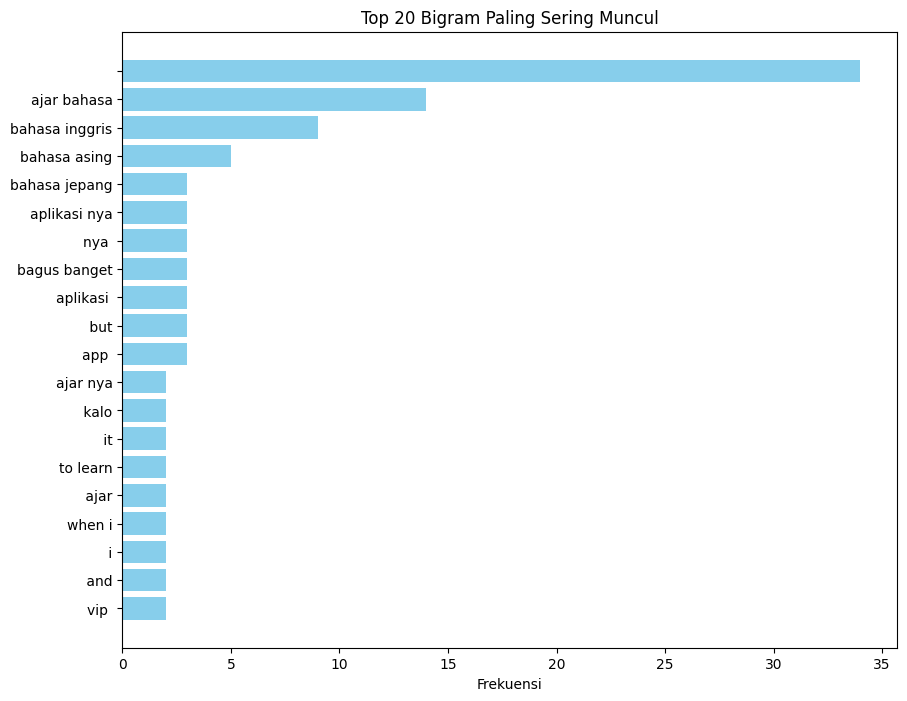

In [45]:
import matplotlib.pyplot as plt
from collections import Counter

# Gabungkan semua bigram menjadi satu list, pastikan hanya bigram (tuple/list dengan 2 elemen) yang diambil
all_bigrams = [
    bigram for sublist in df['bigrams'].dropna()
    for bigram in sublist if isinstance(bigram, (list, tuple)) and len(bigram) == 2
]

# Hitung frekuensi setiap bigram
bigram_counts = Counter(all_bigrams)

# Ambil N bigram yang paling sering muncul
N = 20  # Jumlah bigram teratas yang ingin ditampilkan
top_bigrams = bigram_counts.most_common(N)

# Siapkan data untuk plotting
# Pastikan label dibuat hanya dari bigram yang valid
bigram_labels = [' '.join(map(str, bigram)) for bigram, count in top_bigrams if isinstance(bigram, (list, tuple)) and len(bigram) == 2]
bigram_values = [count for bigram, count in top_bigrams if isinstance(bigram, (list, tuple)) and len(bigram) == 2]


# Buat bar chart
plt.figure(figsize=(10, 8))
# Only plot if there are bigrams to display
if bigram_labels:
    plt.barh(bigram_labels, bigram_values, color='skyblue')
    plt.xlabel("Frekuensi")
    plt.title(f"Top {N} Bigram Paling Sering Muncul")
    plt.gca().invert_yaxis()  # Urutkan dari yang paling sering di atas
    plt.show()
else:
    print("No valid bigrams found with the specified frequency filter.")

**Tri-Gram**

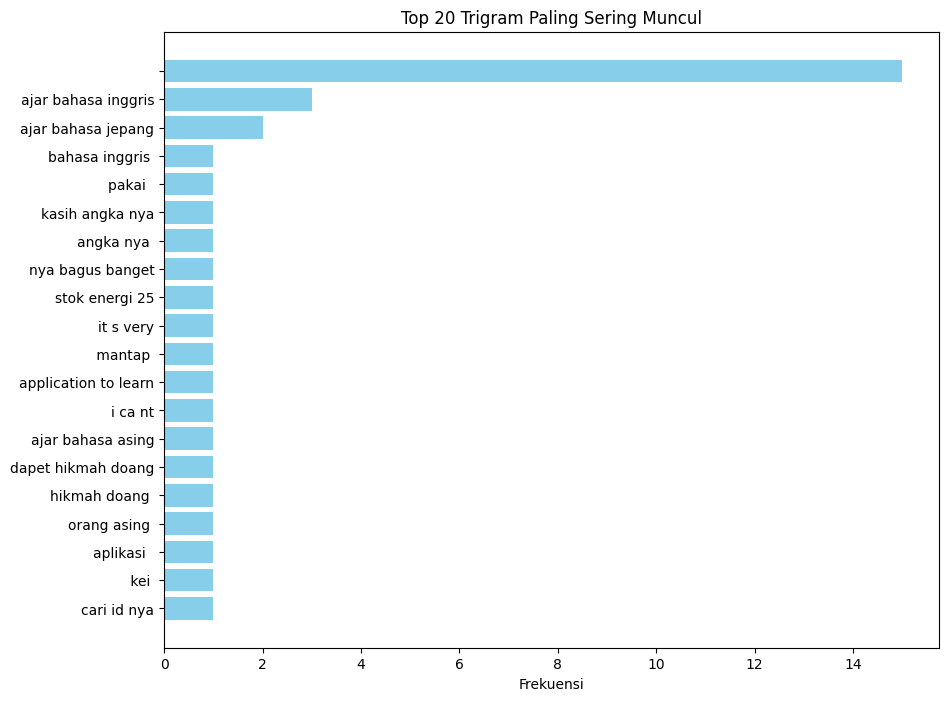

In [41]:
import matplotlib.pyplot as plt
from collections import Counter

# Gabungkan semua trigram menjadi satu list, pastikan hanya trigram (tuple/list dengan 3 elemen) yang diambil
all_trigrams = [
    trigram for sublist in df['trigrams'].dropna()
    for trigram in sublist if isinstance(trigram, (list, tuple)) and len(trigram) == 3
]

# Hitung frekuensi setiap trigram
trigram_counts = Counter(all_trigrams)

# Ambil N trigram yang paling sering muncul
N = 20  # Jumlah trigram teratas yang ingin ditampilkan
top_trigrams = trigram_counts.most_common(N)

# Siapkan data untuk plotting
# Pastikan label dibuat hanya dari trigram yang valid
trigram_labels = [' '.join(map(str, trigram)) for trigram, count in top_trigrams if isinstance(trigram, (list, tuple)) and len(trigram) == 3]
trigram_values = [count for trigram, count in top_trigrams if isinstance(trigram, (list, tuple)) and len(trigram) == 3]

# Buat bar chart
plt.figure(figsize=(10, 8))
# Only plot if there are trigrams to display
if trigram_labels:
    plt.barh(trigram_labels, trigram_values, color='skyblue')
    plt.xlabel("Frekuensi")
    plt.title(f"Top {N} Trigram Paling Sering Muncul")
    plt.gca().invert_yaxis()  # Urutkan dari yang paling sering di atas
    plt.show()
else:
    print("No valid trigrams found with the specified frequency filter.")

**Wordcloud**

In [46]:
pip install wordcloud matplotlib

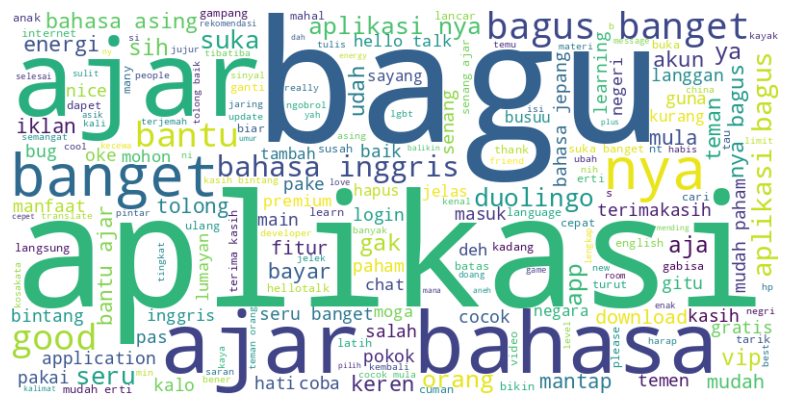

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan semua token dari kolom 'stemmed_review' menjadi satu string
all_words = ' '.join([word for tokens in df['stemmed_review'].dropna() for word in tokens])

# Buat objek WordCloud
# Anda bisa menyesuaikan parameter seperti background_color, width, height, dll.
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Tampilkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # Sembunyikan sumbu x dan y
plt.show()